For this project to run the following python libraries are needed:  
    1.  resemblyzer  
    2.  pandas  
    3.  numpy  
    4. sklearn  
    5. seaborn  
    6. sox  

In [1]:
from resemblyzer import preprocess_wav, VoiceEncoder
#from demo_utils import *
from itertools import groupby
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sox
import warnings
import seaborn as sns
import matplotlib.cm as cm
from sklearn.cluster import KMeans
import time
from sklearn.neighbors import KDTree
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score


#numpy compatibility for bool
np.bool = np.bool_

# to ignore warning messages that take up space
warnings.filterwarnings("ignore")


In [2]:
#Just some preprocessing steps 
vector_index = list(pd.Series(range(0,256)))
vector_index.insert(0,"file_name") 
vectors_dataset =  pd.read_csv("output.csv")
vectors_dataset.columns = vector_index

vectors_dataset[["a","b","user_name","book_chapter","csv_file"]] = vectors_dataset["file_name"].str.split('\\',expand=True)
vectors_dataset = vectors_dataset.drop(['a','b'], axis=1)
vectors_dataset["combined_username"] = vectors_dataset.user_name + "-" + vectors_dataset.book_chapter



In [3]:
#change the N value here to change the number of FLAC files to be merged
N = 10

#The top N FLAC files are used for combination 
dataset_temp = vectors_dataset.groupby('user_name').head(N).reset_index(drop=True)
final_dataset = dataset_temp

final_dataset['file_name'] = final_dataset['file_name'].str.replace("\\",'/')

cbn = sox.Combiner()

#Use the below code to combine FLAC files and generate training files
# for i in final_dataset["user_name"].unique():
#     user_array_files = []
#     file_list = final_dataset[final_dataset["user_name"] == i]["file_name"]
#     for f in file_list:
#         file_str = (f[0:-3]+"flac")
#         user_array_files.append(file_str)
#     cbn.build(user_array_files, 'train-clean-360/audio_samples/data/training_set/'+i+'_combined.flac', 'concatenate')

In [4]:
#change the N value here to change the number of FLAC files to be merged
N = 3
 #The last N files are used to testing set combination
testing_temp = vectors_dataset.groupby('user_name').tail(N).reset_index(drop=True)
final_dataset = testing_temp
final_dataset['file_name'] = final_dataset['file_name'].str.replace("\\",'/')
import sox
# create combiner
cbn = sox.Combiner()

#Use the below code to combine FLAC files and generate testing files
# for i in final_dataset["user_name"].unique():
#     print("username: ",i)
#     user_array_files = []
#     file_list = final_dataset[final_dataset["user_name"] == i]["file_name"]
#     for f in file_list:
#         file_str = (f[0:-3]+"flac")
#         user_array_files.append(file_str)
#     cbn.build(user_array_files, 'train-clean-360/audio_samples/data/testing_set/'+i+'_combined.flac', 'concatenate')

This code is for converting the combined flac files into a richer encoded representation.

In [5]:

encoder = VoiceEncoder()

Loaded the voice encoder model on cpu in 0.01 seconds.


In [6]:
wav_fpaths = list(Path("train-clean-360", "audio_samples","data","training_set").glob("**/*.flac"))

Training Dataset

In [7]:
#The code below converts all combined .flac files into csv files. This process might take around 20 minutes
# for path in wav_fpaths:
#     wav_temp = preprocess_wav(path)
#     encoded_val = encoder.embed_utterance(wav_temp)
#     df = pd.DataFrame(encoded_val,columns=["emded_val"])
#     csv_file = "train-clean-360/audio_samples/data/training_set/csv_files/"+path.stem+".csv"
#     df.to_csv(csv_file,index=False)

In [8]:
#Code for turning separate csv to one whole csv
# csv_paths = []
# all_vectors = pd.DataFrame(columns=np.arange(0,256))
# csv_path = list(Path("train-clean-360", "audio_samples","data","training_set","csv_files").glob("**/*.csv"))
# for c in csv_path:
#     print(c)
#     vec = pd.read_csv(c,names=[str(c)])
#     vec2 = vec.transpose()
#     all_vectors = pd.concat([all_vectors,vec2])
# all_vectors.to_csv("train-clean-360/audio_samples/data/training_vectors.csv")

In [9]:
vectors_dataset =  pd.read_csv("train-clean-360/audio_samples/data/training_vectors.csv")
vectors_dataset = vectors_dataset.drop('0',axis=1)

#Code for cleaning and reading the training csv file
vector_index = list(pd.Series(range(0,256)))
vector_index.insert(0,"file_name") 
vectors_dataset.columns = vector_index
vectors_dataset[["a","b","c","d","e","user_name"]] = vectors_dataset["file_name"].str.split('\\',expand=True)
vectors_dataset = vectors_dataset.drop(['a','b','c','d','e'], axis=1)
final_dataset = vectors_dataset
final_dataset["cosine_similarity"] = 0.0000
final_dataset["temp_cosine_similarity"] = 0.0000
vector_index2 = list(pd.Series(range(0,256)))

Testing Dataset

In [10]:
#The code below converts all combined .flac files into csv files. This process might take around 7 minutes
# test_wav_paths = list(Path("train-clean-360", "audio_samples","data","testing_set").glob("**/*.flac"))
# testing_dataset = pd.DataFrame(columns = ["path","embedded_code"])
# for path in test_wav_paths:
#     wav_temp = preprocess_wav(path)
#     encoded_val = encoder.embed_utterance(wav_temp)
#     df = pd.DataFrame(encoded_val,columns=["emded_val"])
#     csv_file = "train-clean-360/audio_samples/data/testing_set/csv_files/"+path.stem+".csv"
#     df.to_csv(csv_file,index=False)

In [11]:
#Code for turning separate csv to one whole csv
# csv_paths = []
# all_vectors_test = pd.DataFrame(columns=np.arange(0,256))
# csv_path = list(Path("train-clean-360", "audio_samples","data","testing_set","csv_files").glob("**/*.csv"))
# for c in csv_path:
#     print(c)
#     vec = pd.read_csv(c,names=[str(c)])
#     vec2 = vec.transpose()
#     all_vectors_test = pd.concat([all_vectors_test,vec2])
# all_vectors_test.to_csv("train-clean-360/audio_samples/data/testing_vectors.csv")

In [12]:
vectors_dataset_test =  pd.read_csv("train-clean-360/audio_samples/data/testing_vectors.csv")
vectors_dataset_test = vectors_dataset_test.drop('0',axis=1)
vector_index = list(pd.Series(range(0,256)))
vector_index.insert(0,"file_name") 
vectors_dataset_test.columns = vector_index
vectors_dataset_test[["a","b","c","d","e","user_name"]] = vectors_dataset_test["file_name"].str.split('\\',expand=True)
vectors_dataset_test = vectors_dataset_test.drop(['a','b','c','d','e'], axis=1)
vectors_dataset_test.head(5)
testing_dataset1 = vectors_dataset_test

In [13]:
print("The training set is: ")
final_dataset.head(3)

The training set is: 


,file_name,0,1,2,3,4,5,6,7,8,...,249,250,251,252,253,254,255,user_name,cosine_similarity,temp_cosine_similarity
0,train-clean-360\audio_samples\data\training_se...,0.016290,0.000000,0.000000,0.0,0.000000,0.029195,0.008131,0.011694,0.110153,...,0.108059,0.000047,0.027667,0.015939,0.000664,0.0,0.0,1001_combined.csv,0.0,0.0
1,train-clean-360\audio_samples\data\training_se...,0.120240,0.000000,0.049727,0.0,0.000420,0.029869,0.000000,0.003627,0.129419,...,0.000000,0.000000,0.073713,0.022813,0.000000,0.0,0.0,100_combined.csv,0.0,0.0
2,train-clean-360\audio_samples\data\training_se...,0.008594,0.024654,0.000240,0.0,0.000044,0.161903,0.000000,0.011830,0.073376,...,0.000276,0.000375,0.101385,0.016059,0.000000,0.0,0.0,1012_combined.csv,0.0,0.0


In [14]:
print("The testing set is: ")
testing_dataset1.head(3)

The testing set is: 


,file_name,0,1,2,3,4,5,6,7,8,...,247,248,249,250,251,252,253,254,255,user_name
0,train-clean-360\audio_samples\data\testing_set...,0.016571,0.000671,0.034364,0.0,0.000000,0.015983,0.005667,0.007581,0.109301,...,0.000000,0.105785,0.150887,0.000684,0.002922,0.003780,0.0,0.0,0.0,1001_combined.csv
1,train-clean-360\audio_samples\data\testing_set...,0.175204,0.000000,0.053654,0.0,0.001029,0.014178,0.000000,0.037628,0.124555,...,0.000000,0.051093,0.000000,0.000000,0.097677,0.030954,0.0,0.0,0.0,100_combined.csv
2,train-clean-360\audio_samples\data\testing_set...,0.007981,0.026898,0.000000,0.0,0.000000,0.128249,0.000000,0.010590,0.073816,...,0.039789,0.082346,0.000000,0.000000,0.121848,0.015917,0.0,0.0,0.0,1012_combined.csv


Modeling: KMeans cluserting 

Text(0, 0.5, 'Inertia')

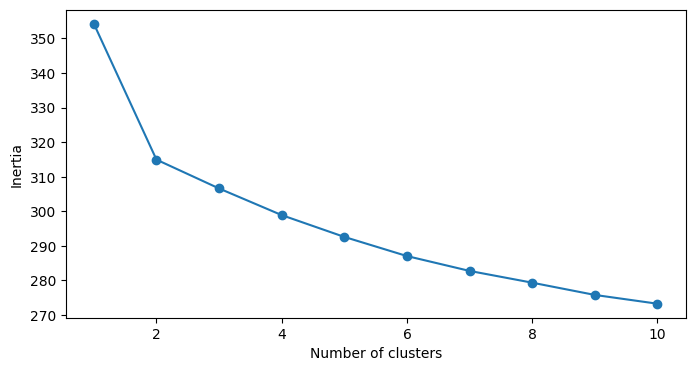

In [15]:


#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
n = 11
for k in range(1,n):
    km = KMeans(n_clusters=k, random_state=2,init='k-means++')
    km.fit(final_dataset[vector_index2].to_numpy())
    sse.append(km.inertia_)

frame = pd.DataFrame({'Cluster':range(1,n), 'SSE':sse})
plt.figure(figsize=(8,4))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [16]:
km = KMeans(n_clusters = 5, random_state=2,init='k-means++')
km.fit(final_dataset[vector_index2].to_numpy())
final_dataset["K_means_clusters"] = km.labels_

In [17]:
start_time = time.time()
testing_dataset1["K_means_cluster_predicted"] = 999
testing_dataset1["identified_username"] = 0
testing_dataset1["cosine_similarity"] = 0.0
for iter1,val1 in testing_dataset1.iterrows():
    cluster_predicted = km.predict(val1[vector_index2].to_numpy().reshape(1, -1))
    #print("cluster_predicted",cluster_predicted)
    testing_dataset1["K_means_cluster_predicted"][iter1] = cluster_predicted[0]
    for iter,val in final_dataset[final_dataset["K_means_clusters"]==cluster_predicted[0]].iterrows():
        cosine_val = np.array(val1[vector_index2]) @ np.array(val[vector_index2])
        final_dataset["temp_cosine_similarity"][iter] = cosine_val
    best_identified = final_dataset.sort_values(by="temp_cosine_similarity",ascending=False).head(1)
    #print(final_dataset.sort_values(by="temp_cosine_similarity",ascending=False).head(1))
    testing_dataset1["identified_username"][iter1] = best_identified["user_name"].values[0]
    testing_dataset1["cosine_similarity"][iter1] = best_identified["temp_cosine_similarity"]
    final_dataset["temp_cosine_similarity"] = 0
    print(iter1)
    #final_dataset.sort_values(by="cosine_similarity",a\scending=False)
end_time = time.time()
print("This process took ",end_time-start_time," seconds")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [18]:
df = testing_dataset1[["user_name","identified_username","K_means_cluster_predicted","cosine_similarity"]].merge(final_dataset[["user_name","K_means_clusters","temp_cosine_similarity"]],on="user_name")

In [19]:
df.to_csv("cluster_Kmeans_output.csv")

Modeling: KDTree

In [20]:
#Training the KDTree algorithm with the training dataset
rng = np.random.RandomState(0)
print("Training the KDTree algorithm now.")
tree = KDTree(final_dataset[vector_index2], leaf_size=24) 
print("Algorithm trained.")   

Training the KDTree algorithm now.
Algorithm trained.


In [21]:
testing_dataset1["kd_tree_user1"] = 9999
testing_dataset1["kd_tree_user2"] = 9999
testing_dataset1["kd_tree_user3"] = 9999
testing_dataset1["kd_tree_user4"] = 9999
testing_dataset1["kd_tree_user5"] = 9999
testing_dataset1["kd_tree_distance1"] = 9999
testing_dataset1["kd_tree_distance2"] = 9999
testing_dataset1["kd_tree_distance3"] = 9999
testing_dataset1["kd_tree_distance4"] = 9999
testing_dataset1["kd_tree_distance5"] = 9999
testing_dataset1["identified_username"] = 9999
testing_dataset1["identified_username2"] = 9999
testing_dataset1["identified_username3"] = 9999
testing_dataset1["identified_username4"] = 9999
testing_dataset1["identified_username5"] = 9999

In [22]:
#testing using the test dataset
start_time = time.time()
for ind,val in testing_dataset1.iterrows():
    dist, ind_tree = tree.query(val[vector_index2].to_numpy().reshape(1, -1), k=5)
    testing_dataset1["kd_tree_user1"][ind] = ind_tree[0][0]
    testing_dataset1["kd_tree_user2"][ind] = ind_tree[0][1]
    testing_dataset1["kd_tree_user3"][ind] = ind_tree[0][2]
    testing_dataset1["kd_tree_user4"][ind] = ind_tree[0][3]
    testing_dataset1["kd_tree_user5"][ind] = ind_tree[0][4]
    testing_dataset1["kd_tree_distance1"][ind] = dist[0][0]
    testing_dataset1["kd_tree_distance2"][ind] = dist[0][1]
    testing_dataset1["kd_tree_distance3"][ind] = dist[0][2]
    testing_dataset1["kd_tree_distance4"][ind] = dist[0][3]
    testing_dataset1["kd_tree_distance5"][ind] = dist[0][4]
    testing_dataset1["identified_username"][ind] = final_dataset["user_name"][ind_tree[0][0]]
    testing_dataset1["identified_username2"][ind] = final_dataset["user_name"][ind_tree[0][1]]
    testing_dataset1["identified_username3"][ind] = final_dataset["user_name"][ind_tree[0][2]]
    testing_dataset1["identified_username4"][ind] = final_dataset["user_name"][ind_tree[0][3]]
    testing_dataset1["identified_username5"][ind] = final_dataset["user_name"][ind_tree[0][4]]
    # print(ind[0])  # indices of 3 closest neighbors
    # print(dist[0])  # distances to 3 closest neighbors
end_time = time.time()
time_elapsed = end_time - start_time
print("Time elapsed is ",time_elapsed)
   


Time elapsed is  1.182199478149414


In [23]:
testing_dataset1.to_csv("output_final_kdtree_5nn.csv")

Spectral Clustering + SVM Classifier

I have tried the Spectral Clustering from 4 to 10 clustering using 5-K cross validation. And found the below settings gave the best results. When tried on actual data, you might consider tweaking the number of clusters in spectral clustering and changing the parameters in SVC classifier.

In [24]:
X = final_dataset[vector_index2]
clustering = SpectralClustering(n_clusters=4, assign_labels='discretize', random_state=7).fit(X)
print("fitted the spectral clustering module on training data.")

fitted the spectral clustering module on training data.


In [25]:
#assign the cluster label to the training dataset for classifier
final_dataset["spectral_cluster_labels"] = clustering.labels_

In [26]:
#splitting into train and test sets for the classifier to be trained on the cluster labels given by spectral clustering
X_train, X_test, y_train, y_test = train_test_split(final_dataset[vector_index2], final_dataset["spectral_cluster_labels"], test_size=0.40, random_state=42)

In [27]:
#The SVM classifer fitted to the training dataset
clf = svm.SVC(kernel = "poly",C=10)
y = final_dataset["spectral_cluster_labels"]
clf.fit(X_train, y_train)

SVC(C=10, kernel='poly')

In [28]:
#Cross Validation for the classfier using 5 folds
scores = cross_val_score(clf, X, y, cv=5)
print("The average of scores is: ")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("")
print("The individual accuracy scores of the folds in  training set:")
print(scores)

The average of scores is: 
0.94 accuracy with a standard deviation of 0.02

The individual accuracy scores of the folds in  training set:
[0.90810811 0.92934783 0.92934783 0.9673913  0.94565217]


In [29]:
y_predict = clf.predict(X_test)

In [30]:
start_time = time.time()
test_pred = clf.predict(testing_dataset1[vector_index2])
print("Predicted the cluster label of the testing data.")
end_time = time.time()
print("This process took ",round(end_time-start_time,3)," seconds for test data prediction")

Predicted the cluster label of the testing data.
This process took  0.017  seconds for test data prediction


In [31]:
testing_dataset1["classified_cluster"] = test_pred

In [32]:
df_spectral = testing_dataset1[["user_name","classified_cluster",]].merge(final_dataset[["user_name","spectral_cluster_labels"]],on="user_name")

In [33]:
df_spectral.to_csv("output_spectral_SVM_clusters.csv")